In [1]:
import pandas as pd
import numpy as np


In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from mlxtend.plotting import plot_decision_regions


- Purpose: This imports the plot_decision_regions function from the mlxtend library, allowing visualization of decision boundaries in machine learning classification.
- Usage: The function is used to plot decision regions for classifiers, aiding in understanding how they separate different classes in a dataset.

In [4]:
df = pd.DataFrame()

In [5]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['Label']=[1,1,0,1,0,1,0,1,0,0]

In [6]:
df

,X1,X2,Label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [7]:
import seaborn as sns


Visualize using scatter plot

<Axes: xlabel='X1', ylabel='X2'>

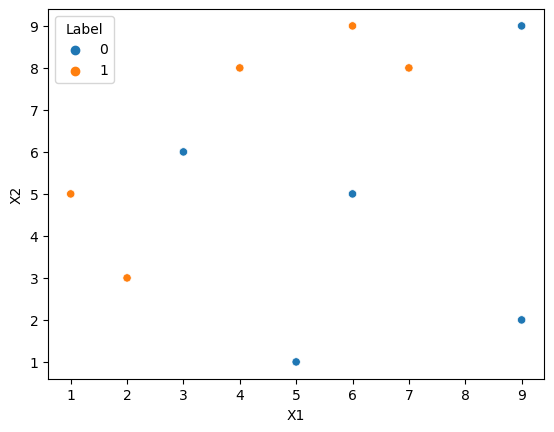

In [8]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['Label'])

In [9]:
df['sample weights'] = 1/df.shape[0]
df['sample weights'] 


0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: sample weights, dtype: float64

calculated the sample weight

In [10]:
df

,X1,X2,Label,sample weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


Now we have to create the Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier(max_depth=1)  # Stump 

In [12]:
X = df.iloc[:,0:2]
y= df.iloc[:,2]

In [13]:
X


,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: Label, dtype: int64

Fitting the tree

In [15]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

For plotting the tree 

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

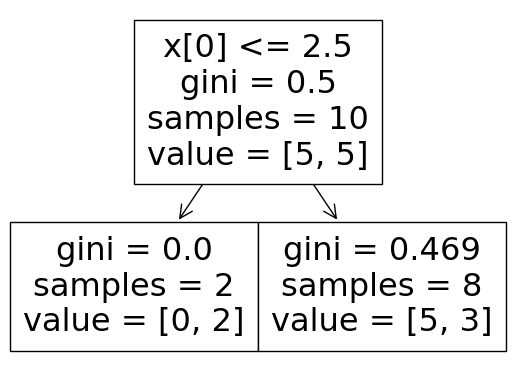

In [17]:
plot_tree(DT1)

The above decision tree is a stump . because it is the descion tree with max_depth = 1

The follwing is used to plot the decision boundary 

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

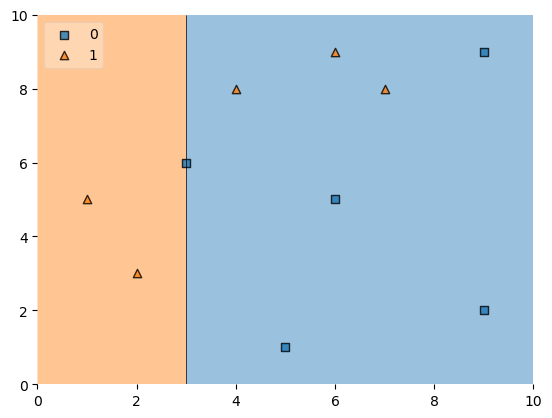

In [18]:
plot_decision_regions(np.array(X),np.array(y),clf=DT1,legend=2)

There are 3 misclassified points 

Lets make a prediction on the data 

In [19]:
DT_pred = DT1.predict(X)
DT_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
df['DT_pred']= DT1.predict(X)

In [21]:
df

,X1,X2,Label,sample weights,DT_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [22]:
error = 0.1*3


Performance of the Stump is,

In [23]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [24]:
alpha1= calculate_model_weight(0.3)
alpha1

0.42364893019360184

Calculate the updated weight


In [25]:
def updated_row_weights(row,alpha=0.423):
    if row['Label'] == row['DT_pred']:
        return row['sample weights']*np.exp(-alpha)

    else :
        return row['sample weights']*np.exp(alpha)


In [26]:
df['updated weights']= df.apply(updated_row_weights,axis=1)

In [27]:
df  

,X1,X2,Label,sample weights,DT_pred,updated weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [28]:
df['sample weights'].sum()

1.0

In [29]:
df['updated weights'].sum()

0.9165153319682015

In [30]:
df['normalized weights'] = df['updated weights']/df['updated weights'].sum()

In [31]:
df

,X1,X2,Label,sample weights,DT_pred,updated weights,normalized weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [32]:
df['normalized weights'].sum()

1.0

In [33]:

df['cumsum_upper'] = np.cumsum(df['normalized weights'])
df['cumsum_lower'] = df['cumsum_upper']-df['normalized weights']

In [34]:
df[['X1',	'X2',	'Label',	'sample weights',	'DT_pred',	'updated weights',	'normalized weights','cumsum_lower'	,'cumsum_upper']]

,X1,X2,Label,sample weights,DT_pred,updated weights,normalized weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


Taking Random samples 

In [35]:
indexes=[]

for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if  row['cumsum_lower'] < a < row['cumsum_upper'] :
            indexes.append(index)
print(indexes)

                

[3, 3, 9, 4, 3, 7, 0, 7, 7, 3]


In [36]:
df.shape[0]

10

## Creating a new DataFrame  for DT2

In [37]:
df

,X1,X2,Label,sample weights,DT_pred,updated weights,normalized weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [38]:
df.iloc[indexes]

,X1,X2,Label,sample weights,DT_pred,updated weights,normalized weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425


Created the  dataframe for the second decision tree

In [39]:
df2 = df.iloc[indexes][['X1','X2','Label']]
df2

,X1,X2,Label
3,4,8,1
3,4,8,1
9,9,2,0
4,5,1,0
3,4,8,1
7,7,8,1
0,1,5,1
7,7,8,1
7,7,8,1
3,4,8,1


In [40]:
from sklearn.tree import DecisionTreeClassifier
DT2= DecisionTreeClassifier(max_depth=1)

In [41]:
X2= df2.iloc[:,0:2]
y2= df.iloc[:,2]

In [42]:
X2

,X1,X2
3,4,8
3,4,8
9,9,2
4,5,1
3,4,8
7,7,8
0,1,5
7,7,8
7,7,8
3,4,8


In [43]:
y2

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: Label, dtype: int64

In [44]:
df2['sample weights'] = 1/df2.shape[0]
df2['sample weights'] 

3    0.1
3    0.1
9    0.1
4    0.1
3    0.1
7    0.1
0    0.1
7    0.1
7    0.1
3    0.1
Name: sample weights, dtype: float64

In [45]:
DT2.fit(X2,y2)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 1.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]')]

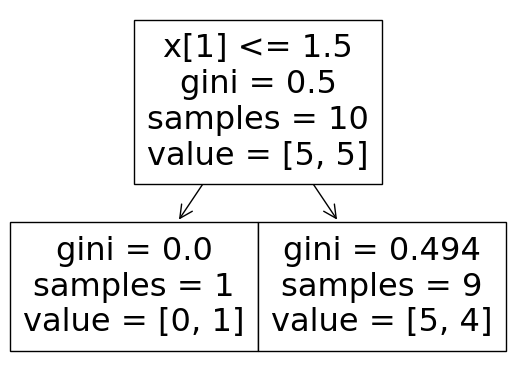

In [46]:
plot_tree(DT2)

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

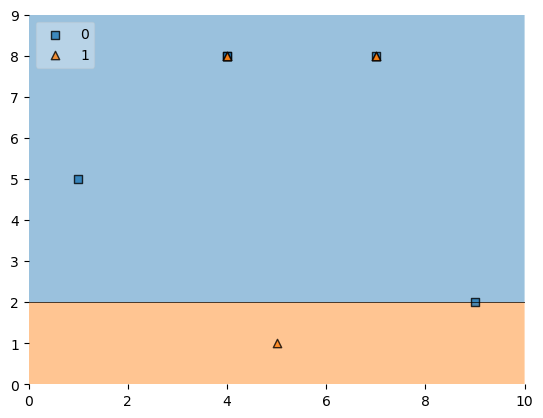

In [47]:
plot_decision_regions(np.array(X2),np.array(y2),clf=DT2,legend=2)

In [48]:
DT_pred = DT2.predict(X2)
DT_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
df2['DT2_pred']= DT2.predict(X2)

In [50]:
df2

,X1,X2,Label,sample weights,DT2_pred
3,4,8,1,0.1,0
3,4,8,1,0.1,0
9,9,2,0,0.1,0
4,5,1,0,0.1,1
3,4,8,1,0.1,0
7,7,8,1,0.1,0
0,1,5,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
3,4,8,1,0.1,0


In [51]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [52]:
alpha2= calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [53]:
def updated_row_weights(row,alpha=0.69):
    if row['Label'] == row['DT2_pred']:
        return row['sample weights']*np.exp(-alpha)

    else :
        return row['sample weights']*np.exp(alpha)

In [54]:
df2['updated weights']= df2.apply(updated_row_weights,axis=1)

In [55]:
df2

,X1,X2,Label,sample weights,DT2_pred,updated weights
3,4,8,1,0.1,0,0.199372
3,4,8,1,0.1,0,0.199372
9,9,2,0,0.1,0,0.050158
4,5,1,0,0.1,1,0.199372
3,4,8,1,0.1,0,0.199372
7,7,8,1,0.1,0,0.199372
0,1,5,1,0.1,0,0.199372
7,7,8,1,0.1,0,0.199372
7,7,8,1,0.1,0,0.199372
3,4,8,1,0.1,0,0.199372


In [56]:
df2['normalized weights'] = df2['updated weights']/df2['updated weights'].sum()

In [57]:
df2['cumsum_upper'] = np.cumsum(df2['normalized weights'])
df2['cumsum_lower'] = df2['cumsum_upper']-df2['normalized weights']

In [58]:
df2[['X1',	'X2',	'Label',	'sample weights',	'DT2_pred',	'updated weights',	'normalized weights','cumsum_lower'	,'cumsum_upper']]

,X1,X2,Label,sample weights,DT2_pred,updated weights,normalized weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,0,0.199372,0.108090,0.000000,0.108090
3,4,8,1,0.1,0,0.199372,0.108090,0.108090,0.216179
9,9,2,0,0.1,0,0.050158,0.027193,0.216179,0.243372
4,5,1,0,0.1,1,0.199372,0.108090,0.243372,0.351462
3,4,8,1,0.1,0,0.199372,0.108090,0.351462,0.459552
7,7,8,1,0.1,0,0.199372,0.108090,0.459552,0.567641
0,1,5,1,0.1,0,0.199372,0.108090,0.567641,0.675731
7,7,8,1,0.1,0,0.199372,0.108090,0.675731,0.783821
7,7,8,1,0.1,0,0.199372,0.108090,0.783821,0.891910
3,4,8,1,0.1,0,0.199372,0.108090,0.891910,1.000000


In [59]:
indexes1=[]

for i in range(df2.shape[0]):
    b=np.random.random()
    for index,row in df2.iterrows():
        if  row['cumsum_lower'] < b < row['cumsum_upper'] :
            indexes1.append(index)
print(indexes)


[3, 3, 9, 4, 3, 7, 0, 7, 7, 3]


## Creating the third dataframe 

In [60]:
df.iloc[indexes1]

,X1,X2,Label,sample weights,DT_pred,updated weights,normalized weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492


In [61]:
df3 = df.iloc[indexes1][['X1','X2','Label']]
df3

,X1,X2,Label
3,4,8,1
9,9,2,0
7,7,8,1
7,7,8,1
4,5,1,0
3,4,8,1
3,4,8,1
0,1,5,1
3,4,8,1
7,7,8,1


#####################################################################################

# Final Prediction

In [62]:
print(alpha1,alpha2)

0.42364893019360184 0.6931471805599453


In [63]:
query = np.array([[5,1]])
query

array([[5, 1]])

In [64]:
DT1.predict(query)

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [65]:
DT2.predict(query)

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [66]:
f=alpha1 * -1 + alpha2 * -1
f

-1.1167961107535471

In [67]:
final_prediction = np.sign(f)
final_prediction

-1.0

## -1 denotes the zero 

In [68]:
query2 = np.array([[6,9]])

In [69]:
DT1.predict(query2)


d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [70]:
DT2.predict(query2)

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [71]:
f2 = (alpha1 * (-1)) + (alpha2* (1))
f2

0.26949825036634345

In [72]:
final_prediction2 = np.sign(f2)
final_prediction2


1.0

# SCikit learn implementation

In [73]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Create a base model (e.g., decision tree)
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(max_depth=1)


In [77]:
# Set the number of iterations (n_estimators) for AdaBoost
n_estimators = 50  # You can adjust this number based on your needs


In [78]:
# Instantiate the AdaBoostClassifier with the specified number of iterations
adaboost_model = AdaBoostClassifier(base_model, n_estimators=n_estimators, random_state=42)


In [79]:
# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [80]:
# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)


In [81]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy}")

Accuracy: 100.0
